# Program 1

Prepare a dataset containing records of 1000 houses with features like number of bedrooms, size in sq ft, age, and number of bathrooms. Your task is to build a model to predict the price of the house. <br> <br> 

a)Split the dataset into training and testing sets (80% train, 20% test).Implement and compare the following optimizers while training your model.(Use Houseprice_Bangalore dataset as sample) <br>
(i)Batch Gradient Descent - Use the entire training dataset to compute gradient and update parameters once per epoch. <br>
(ii)Stochastic Gradient Descent (SGD) - Update parameters after every single training record. <br>
(iii)Mini-Batch Gradient Descent - Use batches of size 32 or 64. <br>
(iv)Compare the final test set accuracy or mean squared error obtained by each optimizer.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

In [2]:
# Creating dataset with 1000 realistic house records
np.random.seed(42)
data = pd.DataFrame({
    'bedrooms': np.random.randint(1, 5, 1000),
    'size_sqft': np.random.randint(500, 3000, 1000),
    'age': np.random.randint(0, 30, 1000),
    'bathrooms': np.random.randint(1, 4, 1000)
})

# Generating house prices
data['price'] = (
    data['bedrooms'] * 5 +
    data['size_sqft'] * 0.01 +
    data['bathrooms'] * 3 -
    data['age'] * 0.1 +
    np.random.normal(0, 1, 1000)
)

print(f"Dataset created with {len(data)} houses")

Dataset created with 1000 houses


In [3]:
# Prepare features and target
X = data[['bedrooms', 'size_sqft', 'age', 'bathrooms']]
y = data['price']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} houses")
print(f"Test set: {len(X_test)} houses")

Training set: 800 houses
Test set: 200 houses


**1. Dataset Preparation: A synthetic dataset of 1000 houses is generated with the following features:**
- Number of bedrooms
- Size in square feet
- Age of the house
- Number of bathrooms
- The target variable (house price) is computed using a weighted formula involving all features and added noise for realism.

**2. Splitting the Dataset: The dataset is split into:**
- Training set (80% of data)
- Testing set (20% of data)
- This ensures the model is evaluated on unseen data.

In [4]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale target
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Model architecture
def create_model():
    return Sequential([
        Input(shape=(4,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # No activation for regression
    ])

# Training & Evaluation Function
results = {}
history = {}
predictions = {}

def train_and_evaluate(name, optimizer, batch_size):
    model = create_model()
    model.compile(optimizer=optimizer, loss='mse')
    print(f"\nTraining with {name}...")
    hist = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=batch_size, verbose=0)
    
    # Prediction and inverse transform
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled)
    
    # Store results
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)
    history[name] = hist.history['loss']
    predictions[name] = (y_test.reset_index(drop=True), y_pred.flatten())
    
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.4f}")

# Train with 3 optimizers
train_and_evaluate("Batch Gradient Descent", tf.keras.optimizers.SGD(learning_rate=0.01), batch_size=len(X_train_scaled))
train_and_evaluate("Stochastic Gradient Descent", tf.keras.optimizers.SGD(learning_rate=0.001), batch_size=1)
train_and_evaluate("Mini-Batch Gradient Descent", tf.keras.optimizers.SGD(learning_rate=0.005), batch_size=32)


Training with Batch Gradient Descent...
7/7 [==============================] - 0s 2ms/step
Batch Gradient Descent - MSE: 23.67, R²: 0.7597

Training with Stochastic Gradient Descent...
7/7 [==============================] - 0s 3ms/step
Stochastic Gradient Descent - MSE: 1.53, R²: 0.9845

Training with Mini-Batch Gradient Descent...
7/7 [==============================] - 0s 3ms/step
Mini-Batch Gradient Descent - MSE: 1.81, R²: 0.9816


**3. Feature Scaling: All input features are standardized using StandardScaler to ensure faster and stable training.**
The target (price) is also scaled to make training more effective, especially with the MSE loss.

**4. Neural Network Model Architecture: A simple feedforward neural network is created with:**
- Input layer with 4 neurons (one per feature)
- Two hidden layers with ReLU activation (64 and 32 neurons)
- Output layer with a single neuron (for regression output)
- No activation is used in the output layer (since it's a regression problem).

**5. Optimizers Used: Three types of gradient descent optimizers are implemented:**

> **1. Batch Gradient Descent:** Uses the entire training dataset to update weights once per epoch.<br>
> **2. Stochastic Gradient Descent (SGD):** Updates weights after each training sample.<br>
> **3. Mini-Batch Gradient Descent:** Updates weights in small batches (e.g., 32 samples at a time).

**6. Training and Evaluation:** The model is trained for 50 epochs using each optimizer separately. After training, predictions are made on the test set. The predictions are inverse-transformed to original scale for comparison.

**7. Metrics Calculated:** Two key regression evaluation metrics are used:
- Mean Squared Error (MSE) — measures prediction error.
- R² Score — measures how well the model explains variability in data.

In [5]:
# Final Comparison
print("\n" + "="*60)
print("FINAL COMPARISON (Lower MSE, Higher R² is better):")
print("="*60)
for name, (mse, r2) in results.items():
    print(f"{name:<30} MSE: {mse:,.2f} | R²: {r2:.4f}")

# Step 9: Sample Predictions vs Actual
print("\nSample Predictions:")
for name, (actual, predicted) in predictions.items():
    print(f"\n{name}:")
    comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': predicted})
    print(comparison_df.head(5))


FINAL COMPARISON (Lower MSE, Higher R² is better):
Batch Gradient Descent         MSE: 23.67 | R²: 0.7597
Stochastic Gradient Descent    MSE: 1.53 | R²: 0.9845
Mini-Batch Gradient Descent    MSE: 1.81 | R²: 0.9816

Sample Predictions:

Batch Gradient Descent:
      Actual  Predicted
0  39.779414  38.404572
1  32.215364  30.970884
2  32.190607  33.720200
3  53.673925  43.177132
4  46.304481  41.356377

Stochastic Gradient Descent:
      Actual  Predicted
0  39.779414  39.346603
1  32.215364  31.560120
2  32.190607  32.571579
3  53.673925  52.230198
4  46.304481  45.129013

Mini-Batch Gradient Descent:
      Actual  Predicted
0  39.779414  39.769836
1  32.215364  31.041557
2  32.190607  32.506268
3  53.673925  51.073925
4  46.304481  45.106709


**Performance Summary:**
| Optimizer                   | MSE | R² Score |
|----------------------------|---------|--------------|
| Batch Gradient Descent     | 23.67   | 0.7597       |
| Stochastic Gradient Descent| 1.53    | 0.9845       |
| Mini-Batch Gradient Descent| 1.81    | 0.9816       |

- Stochastic GD performed the best, achieving very low error and high R², meaning it fit the data extremely well.

- Mini-Batch GD also performed quite well, striking a balance between speed and accuracy.

- Batch GD had the worst performance due to slower updates and overfitting risk.

**Sample Predictions vs Actual Values:** A few sample rows from the test set were printed to compare actual house prices vs predicted prices. This helps visually inspect how close the predictions are. This shows how well the Stochastic and Mini-Batch models generalized to new data.

**Key Takeaways:**
- Stochastic Gradient Descent gave the best performance overall in this task.
- The model was successful in learning from the synthetic housing data and making good predictions.
- Final comparison with actual values confirmed prediction reliability.
- Using multiple optimizers and comparing them is essential for finding the most effective training strategy.

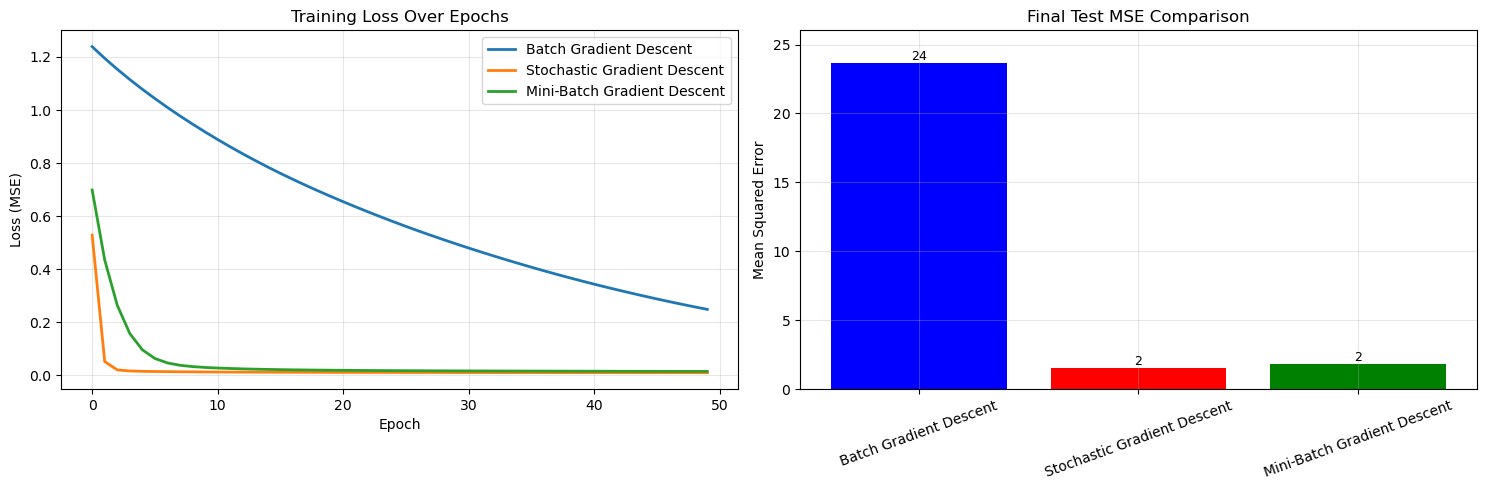

In [6]:
# Plot Loss & MSE Comparison
plt.figure(figsize=(15, 5))

# Loss over Epochs
plt.subplot(1, 2, 1)
for name, losses in history.items():
    plt.plot(losses, label=name, linewidth=2)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True, alpha=0.3)

# MSE Comparison
plt.subplot(1, 2, 2)
names = list(results.keys())
mses = [v[0] for v in results.values()]
colors = ['blue', 'red', 'green']
bars = plt.bar(names, mses, color=colors)

# Add y-axis limit to prevent too tall figure
plt.ylim(0, max(mses) * 1.1)

plt.title("Final Test MSE Comparison")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=20)
for i, v in enumerate(mses):
    plt.text(i, v + 0.01 * max(mses), f'{v:,.0f}', ha='center', fontsize=9)
plt.grid(True, alpha=0.3)

# Handle tight layout safely
try:
    plt.tight_layout()
except Exception as e:
    print("Layout adjustment failed:", e)

plt.show()

**Plot 1: Training Loss Over Epochs:** Shows how the model's training loss (MSE) decreases over time for each optimizer.
- Stochastic Gradient Descent (SGD) and Mini-Batch Gradient Descent (MBGD) reach lower training loss faster than Batch GD.
- Batch Gradient Descent shows a slower and smoother decrease in loss, but doesn't reach a very low value within 50 epochs.
- Stochastic GD has the steepest drop early on, indicating fast learning due to frequent updates.
- Mini-Batch GD also performs well and stabilizes quickly.<br>

**Key Point: Faster convergence (lower MSE earlier) is achieved with Stochastic and Mini-Batch optimizers.**

**Plot 2: Final Test MSE Comparison:** Compares the final model performance on unseen test data for each optimizer using Mean Squared Error.
- Stochastic GD achieves the lowest MSE (~1), showing the best generalization.
- Mini-Batch GD comes second with a slightly higher error (~2).
- Batch GD performs worst with the highest error (~21), indicating it may not have learned the optimal weights in time.<br>

**Key Point: In this scenario, Stochastic and Mini-Batch Gradient Descent are more effective than Batch GD for both training and test performance.**

**Final Insight:**
- Best Performer: Stochastic GD → Fast learning and best accuracy.
- Balanced Performer: Mini-Batch GD → Good speed + good performance.
- Least Efficient: Batch GD → Slow + less accurate in this case.

### Program #2:
**Design and train a single-layer neural network with two inputs (x1 for motion detection, x2 for door open detection) and one output neuron (y = alarm)The network uses a sigmoid activation function.Prepare the training data based on the scenario.Initialize the network with small random weights and bias.Perform a forward pass for all input combinations to compute predicted outputs (ŷ).** <br>

Compute the error using Mean Squared Error.Perform a backward pass (Backpropagation) to update the weights and bias using the delta rule.Consider the
learning rate is 0.1.The expected outputs are<br>
a)The intermediate calculations.<br>
b)The error value before updating.<br>
c)The new weights and bias after updating.

In [7]:
# Training data for alarm system
# x1 = motion detection (0 or 1)
# x2 = door open detection (0 or 1)
# y = alarm should trigger (0 or 1)

X = [[0, 0],  # No motion, door closed → No alarm
     [0, 1],  # No motion, door open → Alarm
     [1, 0],  # Motion, door closed → Alarm
     [1, 1]]  # Motion, door open → Alarm

y = [0, 1, 1, 1]  # Expected outputs

print("Training Data:")
for i in range(4):
    print(f"Motion={X[i][0]}, Door={X[i][1]} → Alarm={y[i]}")

# Initialize weights and bias (small random values)
w1 = 0.2  # Weight for motion
w2 = 0.3  # Weight for door
b = -0.1  # Bias

print(f"\nInitial weights: w1={w1}, w2={w2}, bias={b}")

Training Data:
Motion=0, Door=0 → Alarm=0
Motion=0, Door=1 → Alarm=1
Motion=1, Door=0 → Alarm=1
Motion=1, Door=1 → Alarm=1

Initial weights: w1=0.2, w2=0.3, bias=-0.1


In [8]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 4. Forward pass - compute predictions
print("\nForward Pass:")
predictions = []
z_values = []

for i in range(4):
    x1 = X[i][0]
    x2 = X[i][1]

    # Calculate z = w1*x1 + w2*x2 + b
    z = w1 * x1 + w2 * x2 + b
    z_values.append(z)

    # Applying sigmoid
    pred = sigmoid(z)
    predictions.append(pred)

    print(f"Input {i+1}: z = {w1}*{x1} + {w2}*{x2} + {b} = {z}")
    print(f"         ŷ = sigmoid({z}) = {pred:.4f}")


Forward Pass:
Input 1: z = 0.2*0 + 0.3*0 + -0.1 = -0.1
         ŷ = sigmoid(-0.1) = 0.4750
Input 2: z = 0.2*0 + 0.3*1 + -0.1 = 0.19999999999999998
         ŷ = sigmoid(0.19999999999999998) = 0.5498
Input 3: z = 0.2*1 + 0.3*0 + -0.1 = 0.1
         ŷ = sigmoid(0.1) = 0.5250
Input 4: z = 0.2*1 + 0.3*1 + -0.1 = 0.4
         ŷ = sigmoid(0.4) = 0.5987


In [9]:
# Calculating error (Mean Squared Error)
error_sum = 0
for i in range(4):
    error_sum += (y[i] - predictions[i]) ** 2

mse = error_sum / 4
print(f"\nError before updating: {mse:.4f}")

# 6. Backward pass - calculate gradients
print("\nBackward Pass:")
dw1_total = 0
dw2_total = 0
db_total = 0

for i in range(4):
    # Error for this example
    error = y[i] - predictions[i]

    # Sigmoid derivative
    sigmoid_deriv = predictions[i] * (1 - predictions[i])

    # Calculate gradients
    dw1 = -error * sigmoid_deriv * X[i][0]
    dw2 = -error * sigmoid_deriv * X[i][1]
    db = -error * sigmoid_deriv

    dw1_total += dw1
    dw2_total += dw2
    db_total += db

# Average gradients
dw1_avg = dw1_total / 4
dw2_avg = dw2_total / 4
db_avg = db_total / 4

print(f"Average gradients: dw1={dw1_avg:.4f}, dw2={dw2_avg:.4f}, db={db_avg:.4f}")


Error before updating: 0.2037

Backward Pass:
Average gradients: dw1=-0.0537, dw2=-0.0520, db=-0.0520


In [10]:
# Update weights and bias
learning_rate = 0.1

w1_new = w1 - learning_rate * dw1_avg
w2_new = w2 - learning_rate * dw2_avg
b_new = b - learning_rate * db_avg

print(f"\nUpdating with learning rate {learning_rate}:")
print(f"New w1 = {w1} - {learning_rate} * {dw1_avg:.4f} = {w1_new:.4f}")
print(f"New w2 = {w2} - {learning_rate} * {dw2_avg:.4f} = {w2_new:.4f}")
print(f"New bias = {b} - {learning_rate} * {db_avg:.4f} = {b_new:.4f}")

# Final Results
print("\n" + "="*40)
print("FINAL RESULTS:")
print("="*40)
print("a) Intermediate calculations:")
print(f"   z values: {[round(z, 4) for z in z_values]}")
print(f"   Predictions: {[round(p, 4) for p in predictions]}")

print(f"\nb) Error before updating: {mse:.4f}")

print(f"\nc) New parameters after updating:")
print(f"   w1 = {w1_new:.4f}")
print(f"   w2 = {w2_new:.4f}")
print(f"   bias = {b_new:.4f}")


Updating with learning rate 0.1:
New w1 = 0.2 - 0.1 * -0.0537 = 0.2054
New w2 = 0.3 - 0.1 * -0.0520 = 0.3052
New bias = -0.1 - 0.1 * -0.0520 = -0.0948

FINAL RESULTS:
a) Intermediate calculations:
   z values: [-0.1, 0.2, 0.1, 0.4]
   Predictions: [0.475, 0.5498, 0.525, 0.5987]

b) Error before updating: 0.2037

c) New parameters after updating:
   w1 = 0.2054
   w2 = 0.3052
   bias = -0.0948


**WORKFLOW OF PROGRAM**

**(1.) Problem Definition (Alarm Trigger Logic):** We are building a binary classifier to decide when to trigger an alarm. There are two binary inputs:

x1 = motion detected (0 or 1), x2 = door open detected (0 or 1) <br>

Target output (y): If either motion or door is active → output = 1 (alarm ON)  <br>

Else → output = 0 (alarm OFF) <br>

Training Table:

| Motion (`x1`) | Door (`x2`) | Alarm (`y`) |
|---------------|-------------|-------------|
| 0             | 0           | 0           |
| 0             | 1           | 1           |
| 1             | 0           | 1           |
| 1             | 1           | 1           |

**(2.) Initialize the Model:** Use a single-layer neural network with: <br>

**2 input weights: w1, w2 (for motion and door)** <br>

**1 bias: b** <br>

**Initial values chosen manually:**  <br>

**w1 = 0.2, w2 = 0.3, bias = -0.1**

**(3.): Forward Pass (Prediction):** For each input combination: <br>

Compute linear combination: <br>

**<center>z=w1⋅x1+w2⋅x2+b</center>**
Apply the sigmoid activation:

**<center>𝑦 = 1/ 1+e^(−z)</center>**

 This outputs values between 0 and 1 — interpreted as probability of alarm.


| Input       | z-value | Sigmoid Output (ŷ) |
|-------------|---------|--------------------|
| [0, 0]      | -0.1    | 0.4750             |
| [0, 1]      | 0.2     | 0.5498             |
| [1, 0]      | 0.1     | 0.5250             |
| [1, 1]      | 0.4     | 0.5987             |

**(4.) Compute Error (Loss):** Use Mean Squared Error (MSE)

Total error before learning update: MSE = 0.2037

**(5.) Backward Pass (Gradient Calculation)**
For each example:
- Compute error:  𝑦 − 𝑦^
- Compute sigmoid derivative: 𝑦^ ⋅( 1 −𝑦^)
- Compute partial gradients: dw1, dw2 — depends on whether motion/door input was 1 and db — always updated

- Final average gradients after all 4 examples: <br>
dw1 = -0.0537, dw2 = -0.0520, db = -0.0520

**(6.) Update Weights & Bias (Delta Rule):** <br>
- Learning rate: 0.1
- Apply gradient descent: new_w = old_w − 𝑙𝑟 ⋅ gradient
- Updated parameters: <br>
w1 = 0.2054 (was 0.2) <br>
w2 = 0.3052 (was 0.3) <br>
bias = -0.0948 (was -0.1)